# COGS 118A - Final Project

# Traffic Sign Recognition: CNN vs RNN

## Group members

- Alexander Huynh
- Yimin Lu
- Jenny Vu
- Dong Pham

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

The goal for this project is to come up with an image classification model for road signs to aid computer vision style of self driving or computer vision aided driving. We will be using a data set from Kaggle that will have road signs from Germany with about 180 class labels that will be used as a training set. The training set will have about 100K images and testing will have about 50K images. We will be testing the effectiveness and performance of 3 different sizes of Convolutional Neural Networks (CNNs) with and without Residual Connections. We will implement these models and then will compare them by using cross validation techniques that were taught in class. We want our models to classify different road signs and will select the model with the best accuracy on a testing set. Accuracy testing will be done by comparing the metadata file that was given.

# Background


   Traffic sign classification is an important feature of the self-driving car control pipeline. First, the image taken from the camera mounted on the self-driving car requires traffic sign detection, since there may be multiple or no signs within the picture, and state-of-the-art object detection deep neural networks are deployed for this task such as Faster R-CNN, R-FCN, SSD, and YOLO V2.</a>[<sup>[1]</sup>](#arcosnote)

   After object detection has found and cropped out street signs from the original image from the self-driving car's camera, the cropped street sign images now require traffic sign classification to understand whether or not each street sign seen is a stop sign, a yield sign, etc. Which is very important information the self-driving car needs in order to obey traffic rules and keep its passengers safe.</a>[<sup>[2]</sup>](#kakarlanote) The state-of-the-art networks that process this task are Resnet V1 50, Resnet V1 101, Inception V2, Inception Resnet V2, Mobilenet V1, and Darknet-19.</a>[<sup>[1]</sup>](#arcosnote)
   
   The state-of-the art models mostly use Residual Networks (ResNets), which are a type of Convolutional Neural Network (CNN) that has adds \"identity shortcut connections\" in order to overcome the vanishing gradient problem which occurs when a network has too many layers.</a>[<sup>[3]</sup>](#kakarlanote)

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

Self driving cars are the future of transportation in car centric nations. One of the main problems of self-driving cars is detection and recognition of road signs. There are many shapes and objects that people need to discern when driving and it should not be different for computer vision type of self driving. Computer vision style driving allows self driving cars to know what is around the environment. Roadsigns notifies the driver about the rules of the road and promotes safe driving. There are a lot of things to process while we are driving and we need to be able to discern the noise from the road signs. How these road signs are perceived are impacted by things such as the weather(e.g. fog, snow) and the lighting of the area. It is important for self driving models to discern roadsigns despite the environment so they can follow the rules of the road. Utilizing one of the neural network models, we can sift through the data and return the correct symbol analysis.

# Data

Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!

The dataset we will be using is “Traffic Signs (GTSRB plus 162 custom classes)” created by Daniil Deltsov from Kaggle.

https://www.kaggle.com/datasets/daniildeltsov/traffic-signs-gtsrb-plus-162-custom-classes

The dataset contains 150k images(observations) separated into 205 classes of traffic signs. This dataset is built on the German Traffic Sign Recognition Benchmark Image Set which originally had 43 classes. The images of each sign are assigned to some folder labeled between 0-204. Each class contains 5-40 original images of the sign and additional generated images. The original images varied in background, lighting, and size of sign. By running 5 different transformations 7 times on each original image, more variety of how these traffic signs are viewed is added to the dataset. There is a test folder consisting of 50k images taken from the training set. The observations are png files of different sizes and must be preprocessed before being able to be fed into the models of CNN.


***Currently we cannot import the whole data set to datahub and the github, so most of the computation and data handling will be done on local machines***

We will import cells and their output onto this document
The images were looped through and resized to be 32x32. By having the images being 32x32 it allows us to train the model on 100k images without it being computationally expensive. After being resized, an image is then converted into a np.array of the same dimensions and appended to an image array which is named X, our data. For some of the images, it will have arrays containing the 32x32 image pixels and the 3 RGB values for each pixel.



### Extracting images

The dataset is sorted on a local machine using a local directory. We will need to import the dataset in a way that the environment will be able to handle it.

In [ ]:
images = []
labels = []
for i in range(classes):
    path = os.path.join(current_path, 'Data_images', 'train', str(i))
    img_folder = os.listdir(path)
    for j in img_folder:
       try:
           image = cv.imread(str(path+'/'+j))
           image = cv.resize(image, (32, 32))
           image = np.array(image)
           images.append(image)
           label = np.zeros(classes)
           label[i] = 1.0
           labels.append(label)
       except:
           pass
   

We will have two data arrays that will store the images and the labels. This code will run and parse through the files and add values to the corresponding tables. 

In [ ]:
images = np.array(images)
images = images / 255
labels = np.array(labels)
X = images.astype(np.float32)
y = labels.astype(np.float32)

These lines of code will convert the arrays into numpy arrays. The images array has every element divided by 255 so they will work easier as floats and we can run our computer vision library to check on the images. The labels is used to create array y. y contains the one-hot encoded arrays of labels for the 205 classes of roadsigns.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(48713, 32, 32, 3) (48713, 32, 32, 3) (48713, 205) (48713, 205)


The X and y are split into training and testing sets with ~48k data image points each.

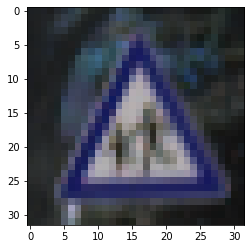

In [ ]:
plt.imshow(X_train[10, :, :, :])

This is just a sample image of one of the data points that will be passed through the neural networks that we are going to train.

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

For our solution we decided to use 6 total different versions of a CNN model to solve our traffic sign classification problem.

-CNN 5 layer
-CNN 7 layer
-CNN 9 layer

(RNN = CNN with residual connections)

-RNN 5 layer 
-RNN 7 layer
-RNN 9 layer

We will train each of these algorithms multiple times, and compare their performance against each other. It is known that old-school unsupervised methods have been largely outperformed by modern supervised techniques, however modern supervised algorithms require much more computational power in order to work. We will see how many epochs each model takes to converge, and how model size/residual connections affects training time and accuracy.

***Note***: that our benchmark model will be a Convolutional Neural Network LeNet-5 </a>[<sup>[4]</sup>](#lenote) which was composed in the 90s by LeCun et al. This is one of the oldest CNN, but it is still accurate and efficient for our task of classifying traffic signs. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

Within the CNN models that we will create, we will use Adam optimization, which is a type of Stochastic Gradient Descent (SGD) algorithm that is a combination of RMSprop and Nesterov momentum-based techniques. Adam has consistently shown good performance across different models in many different use cases, and is the most widely used optimizer for machine learning today, not to mention it is the default optimizer for TensorFlow.

The loss function to be optimized will be a logarithmic (probabilistic) loss, cross-entropy loss with softmax. The softmax layer improves performance of our metric by enhancing classes with larger probabilities and diminishing classes with smaller probabilities, which makes the decision of the network more clear. The reason Cross-entropy loss is used is because probabilistic loss makes it so that when error is high, the gradient is very steep, and will drive the network speedily to a less erroneous solution faster. This metric is designed to improve both training time and performance of the network.

When we evaluate the performance of the model on the test set, and spell out results, we will use percentage error since that is the most straightforward way for humans to interpret and judge the performance of the network.

For road signs, it is essential that the road sign is correctly identified and understood. Each set of models and their respective metrics give a result is an indicator of how well the models are able to categorize some image to a category. Cross-entropy loss in multi-classification indicates how close the predicted values are to the true value. Percentage error gives an overall on how often the model correctly classifies an image.

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

We will be employing a Kaggle data collection as a training set, which will include road signs from Germany with about 180 class labels.The training set will have around 100K photos, whereas the testing set will contain approximately 50K images.Three different sizes of Convolutional Neural Networks (CNNs) with and without Residual Connections will be tested for efficacy and performance. We will use Faster R-CNN, R-FCN, SSD, and YOLO V2 to detect traffic signs. Then by utilizing Resnet V1 50, Resnet V1 101, Inception V2, Inception Resnet V2, Mobilenet V1, and Darknet-19 we can classify the traffic signs. By using ResNet and CNN we can overcome the issue of vanishing gradient. 
### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

Utilizing randomized search CV as the cross validation, will allow us to perform a grid search on all the hyperparameter combinations. With five cross validation folds and ten candidates, we will end with fifty runs for our cross validation. 
### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

For our base model we decided on the LeNet neural network. We set the batch size to be 128 and the epoch to 40. The larger batch allowed us to increase the speed of the runtime of the process. By deploying only the 5x5 convolution filters we were able to get a 97.5% on the validation accuracy and a 95.5% on the training accuracy. With this newfound information we decided to tune these four specific hyperparameters. The batch size, dropout, filter size, and the epoch. Lastly, as mentioned above, we went with a five fold cross validation. 
### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

As stated above we decided to tune these four specific hyperparameters: batch size, drop out rate, filter size and epoch. While smaller batch sizes generally give a better result, we did not want to suffer the consequence of a high computation cost. Therefore, we choose these three batch sizes to run with, 32, 64 and 128. The dropout rate allows for better accuracy because it can help with overfitting. For this hyperparameter we chose: 0.2,0.25,0.5, and 0.1. The convolution filters we chose were 5x5, 7x7 and 9x9. Lastly, we decided it was best to leave the epoch size to 40. This is because any larger size would greatly increase the runtime and computation load. 
### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



### LeNet-5 Benchmark 

Our benchmark CNN model is the LeNet-5 made by LeCun *et al* [<sup>[4]</sup>](#lenote). In the paper it was made to find distinct digits in the MINST dataset. It is one of the classical CNN and it would be the benchmark model for comparing a hyper-tuned version of it and a residual neural network.

In [ ]:
def LeNet(drop_1 = 0.25, drop_2 = 0.25, drop_3 = .5 , k_size1 = (5,5), k_size2 = (3,3)):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=k_size1, activation='relu', input_shape=X_train.shape[1:])) 
    model.add(Conv2D(filters=32, kernel_size=k_size1, activation='relu')) 
    model.add(MaxPool2D(pool_size=(2,2))) 
    model.add(Dropout(rate=drop_1)) 
    model.add(Conv2D(filters=64, kernel_size=k_size2, activation='relu')) 
    model.add(Conv2D(filters=64, kernel_size=k_size2, activation='relu')) 
    model.add(MaxPool2D(pool_size=(2,2))) 
    model.add(Dropout(rate=drop_2)) 
    model.add(Flatten()) 
    model.add(Dense(256, activation='relu')) 
    model.add(Dropout(rate=drop_3))
    model.add(Dense(classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model

We will now test the benchmark model, this will have a batch size of 128 and will loop over 40 times. We use a larger batch number in order to speed up the process of running through the model for validation given the size of the data set.

In [ ]:
test = LeNet()
test_plot = test.fit(X_train, y_train, batch_size= 128, epochs= 40, validation_data=(X_test,y_test))

Epoch 1/40
381/381 [==============================] - 4s 9ms/step - loss: 3.3726 - accuracy: 0.2573 - val_loss: 1.3799 - val_accuracy: 0.6247
Epoch 2/40
381/381 [==============================] - 3s 8ms/step - loss: 1.4154 - accuracy: 0.6145 - val_loss: 0.6439 - val_accuracy: 0.8209
Epoch 3/40
381/381 [==============================] - 3s 8ms/step - loss: 0.9315 - accuracy: 0.7353 - val_loss: 0.4429 - val_accuracy: 0.8799
Epoch 4/40
381/381 [==============================] - 3s 8ms/step - loss: 0.7102 - accuracy: 0.7956 - val_loss: 0.3489 - val_accuracy: 0.9084
Epoch 5/40
381/381 [==============================] - 3s 7ms/step - loss: 0.5948 - accuracy: 0.8270 - val_loss: 0.2993 - val_accuracy: 0.9167
Epoch 6/40
381/381 [==============================] - 3s 8ms/step - loss: 0.5084 - accuracy: 0.8487 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 7/40
381/381 [==============================] - 3s 8ms/step - loss: 0.4544 - accuracy: 0.8642 - val_loss: 0.2187 - val_accuracy: 0.9416
Epoch 

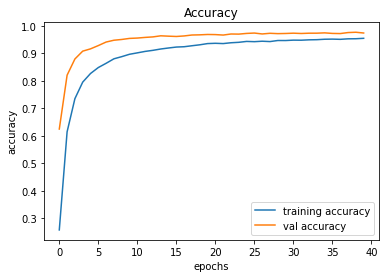

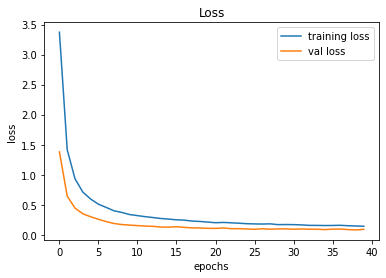

In [ ]:
plt.figure(0)
plt.plot(test_plot.history['accuracy'], label='training accuracy')
plt.plot(test_plot.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(test_plot.history['loss'], label='training loss')
plt.plot(test_plot.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


Overall, the base model with 5x5 filters did a pretty good job with a 97.5% on validation accuracy and a 95.5% on the training accuracy. We can see as the model is going through more epochs the training and validation are imporoving. We can also see a convergence of the accuracies in the later stages. We see that the loss is getting smaller and converging

### Lenet Hyperparameter Tuning

We have seen the basic model of the our base LeNet Neural network, now we want to see how far we can push this model with hyperparameter tuning.

In [ ]:
batches = [32,64,128]
dropout = [0.2, 0.25, 0.5, 0.1] 
filtersize_1 = [(5,5), (7,7), (9,9)]
filtersize_2 = [(3,3), (2,2), (1,1)]
search_space = dict(batch_size = batches, drop_1 = dropout, drop_2 = dropout, drop_3 = dropout, k_size1 = filtersize_1, k_size2 = filtersize_2)

These will be the hyperparameters that we are going to tune our LeNet Neural network: 
- Batches is the batch size of the data, it is the amount data points in a single partition that is going to be passed through our Neural Network, the higher the value the faster it runs. 
- Dropout is the dropout rate of the data, it is primarily used to compensate for overfitting, we are going to use 3 dropout rates for hypertuning. 
- Filter size is the size of our filter for the neural network, in this case we have to run a smaller filter on the latter half of our NN. 
- Epoch is the number of times we are going to train our neural network. It will always tune in hyperparameter tuning, but 40 epochs would be a solid number.



In [ ]:
clf_keras = KerasClassifier(build_fn = LeNet, epochs = 40, verbose = 0)

We will wrap our tensorflow function into a Scikit learn wrapper in order to do our cross validation and randomized search.

In [ ]:
rand = RandomizedSearchCV(estimator=clf_keras, param_distributions=search_space, verbose= 3, cv = 5)

This cross validation will be a randomized search CV, since it will take a lot of computation and time to perform a grid search on the every possible combination of hyperparameters that we have in our dictionary. 

There there will be five cross validation folds and it will run through 10 candidates. This will equal to 50 runs in total for our cross validation. This will take about an hour to run the whole randomized search. This was gridsearch cross validation, with 1728 candidates, it would take a whole day to run the cross validation and would put unwarrented stress on our personal systems.

In [ ]:
rand.fit(X_train,y_train)

After tuning the fitting of our randomized search, we came up with the best score below.

In [ ]:
rand.best_score_

0.9691457509994507

These are the parameters that resulted in the best score:

In [ ]:
params = rand.best_params_
params

{'k_size2': (2, 2),
 'k_size1': (5, 5),
 'drop_3': 0.25,
 'drop_2': 0.2,
 'drop_1': 0.1,
 'batch_size': 128}

This will be our hyperparameter tuned CNN model. There is still a 5x5 layer, but we have a smaller filter implemented on the the 2nd half of the neural network.

In [ ]:
hyper = LeNet(drop_1= 0.1, drop_2= 0.1, drop_3 = 0.25, k_size1= (5,5), k_size2=(2,2))
hyper_plot = hyper.fit(X_train, y_train, batch_size= 128, epochs= 40, validation_data=(X_test,y_test))

Epoch 1/40
381/381 [==============================] - 9s 8ms/step - loss: 2.8701 - accuracy: 0.3420 - val_loss: 1.0422 - val_accuracy: 0.7196
Epoch 2/40
381/381 [==============================] - 2s 7ms/step - loss: 0.8993 - accuracy: 0.7470 - val_loss: 0.4532 - val_accuracy: 0.8798
Epoch 3/40
381/381 [==============================] - 2s 6ms/step - loss: 0.5127 - accuracy: 0.8494 - val_loss: 0.3351 - val_accuracy: 0.9065
Epoch 4/40
381/381 [==============================] - 2s 6ms/step - loss: 0.3634 - accuracy: 0.8919 - val_loss: 0.2645 - val_accuracy: 0.9283
Epoch 5/40
381/381 [==============================] - 2s 7ms/step - loss: 0.2851 - accuracy: 0.9135 - val_loss: 0.2210 - val_accuracy: 0.9385
Epoch 6/40
381/381 [==============================] - 2s 7ms/step - loss: 0.2251 - accuracy: 0.9295 - val_loss: 0.2000 - val_accuracy: 0.9463
Epoch 7/40
381/381 [==============================] - 2s 7ms/step - loss: 0.1843 - accuracy: 0.9423 - val_loss: 0.1806 - val_accuracy: 0.9495
Epoch 

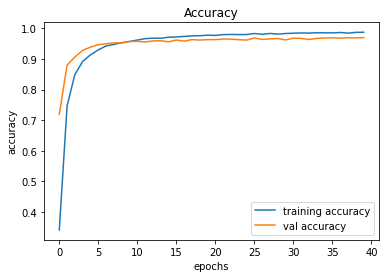

In [ ]:
plt.plot(hyper_plot.history['accuracy'], label='training accuracy')
plt.plot(hyper_plot.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

From the graph and the verbose of fitting the data into our model, it looks like our hyperparameter tuned model is overfitting to the training data. We can see the intersect of the two accuracy values within our graph. Our training accuracy is higher then the validation acuracy. It is still an accurate model none the less, with a 96.9% validation accuracy. We can try implementing our model with less epochs in order to combat the overfitting of training data.

Compared to the base model our hyperparameter tuned model, the hyper-tuned model overfitted with the training data set. The validation accuracy of the base model is 97.7% with a training accuracy of 95.5%, while the hyper tuned model has a validation accuracy of 96.9% with a 98.7% training accuracy. Overall the base LeNet-5 model would be the best performer out of the two models. We could have done a grid search, to find the best true hyperparameters, but that would be computationally expensive.

Having the the model that is overfitted to the training data is still normal. We will still use the hyper-parameters that we have came up. Since, the hyper-tuned model has a decent validation accuracy.

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

One of the limitations that we had was time. Mainly, we could've done grid search for the best hyperparameters rather than using a randomized search and cross-validation. Sometimes randomized search would lead to hyperparameters that are not the best scenario and accuracy. In our case for CNN, it led the model to overfit with the training data and have a smaller validation accuracy. We would also want to explore different epochs and hyperparameters for each model to see if there is a change in validation accuracy and the time it takes to fit the data with the model.

Another that was considered was that the data was already transformed or modified, not showing the original image. We had to transform the data even more by compressing them to make them easier to read from the model's perspective. Compressing images can make small important details invisible in the computer vision world. We want a model that would take the full definition of the image and use that for training.

Another limitation is that the dataset was too big (16 GBs) and we had to store the data set into our local machines. We think that our local machines do not have the computing power compared to the Datahub clusters and can be a reason why it takes a long time to fit the data within our models. Using local machines did not only make our training times longer, but it also limited the access the data to specific group mates. Next time, we would want to have pickle files of our dataset or work with a smaller version of the dataset so it could be easily accessed by everyone, and can also be used on the Datahub clusters. 

### Ethics & Privacy

Traffic signs are designed to communicate traffic laws and regulate the flow of vehicles using the roads. This prevents accidents and ensures the safety of many drivers. The dataset of images, itself, doesn't pose any privacy risk, but may fail to train algorithms to correctly identify a sign for every instance. Training data available may not be representative of all environmental conditions signs can appear in. Additionally, the signs on which algorithms are trained on, may become outdated resulting in the model failing to identify traffic signs.

In application to the real world situations, image classification of traffic signs will most likely be utilized for autonomous vehicles or address some need of understanding traffic. Given the purpose of traffic signs, it has the potential to put lives in harm's way.

In order to address issues of safety and traffic sign changes, the regulating administration of transportation would have to have some tests to ensure the algorithms and vehicles meet an acceptable standard to be publicly used. These checks must occur at set frequencies to ensure everything is up to date. There must be clear communication on changes in signs or traffic laws to companies utilizing traffic sign identification in order for it to be safely used.

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="arcosnote"></a>1.[^](#arcosnote): Evaluation of deep neural networks for traffic sign detection systems. *Neurocomputing 2018*. https://paperswithcode.com/paper/evaluation-of-deep-neural-networks-for<br> 
<a name="kakarlanote"></a>2.[^](#kakarlanote): Traffic Sign Classification using Residual Networks(ResNet). *Syam Kakarla*. https://towardsdatascience.com/traffic-sign-classification-using-residual-networks-resnet-4b550046ff83<br>
<a name="pytorchnote"></a>3.[^](#pytorchnote): How Does PyTorch Support ResNet?. *run.ai*. https://www.run.ai/guides/deep-learning-for-computer-vision/pytorch-resnet#ResNet-Architecture<br>
<a name= "lenote"></a>4.[^](#lenote): Gradient-Base Learning applied to Document Recognition. *Yann LeCun et. al*. http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf